In [2]:
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt

Inputs: Choose a file you want to find the hot pixels for. Choose a specific pixel from that file you are interested in.

In [137]:
f = hp.File('/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_07_44_06_CET.h5', 'r') #reads the file I want
#print(list(f.keys())) #prints the different groups in file
#print(f['packets'].dtype) #We examine the dataset/group called packets and find its data type. Turns out it has many different subgroups
a = 1
b = 5
c = 13
d = 18
pixel = [a,b,c,d]


In [138]:
#We now define the function for the masks that finds the percentage of the total packets that correspond to our chosen pixel

def masking(array):
    data_mask         = f['packets'][:]['packet_type']      == 0  #Select the packets that correspond to "data"
    valid_parity_mask = f['packets'][:]['valid_parity']     == 1  #Select the packets with the valid parity?
    io_group_mask     = f['packets'][:]['io_group']         == array[0]  #Select the packets corresponding to tile in IO Group 1
    io_channel_mask   = f['packets'][:]['io_channel']       == array[1]  #Select the packets corresponding to tile in IO Channel 8
    chip_mask         = f['packets'][:]['chip_id']          == array[2]  #Select the packets corresponding to chip in tile specified above
    pixel_mask        = f['packets'][:]['register_address'] == array[3]  #Select the packet corresponding to pixel in chip specified above
    m                 = np.logical_and(pixel_mask, np.logical_and(chip_mask, np.logical_and(io_group_mask, np.logical_and(io_channel_mask, np.logical_and(data_mask, valid_parity_mask)))))
    n                 = np.logical_and(data_mask, valid_parity_mask)
    adc               = f['packets']['dataword'][m]
    total_packets     = f['packets']['dataword'][n]
    print(len(adc)/len(total_packets))
 

In [139]:
#See what the function does for our pixel in the chosen file
masking(pixel)

0.0


Store the results: We want to keep track of the file and the pixel for future reference. So far I've only managed to do this manually, which takes way too much time. I don't know of other ways, but I have to think more and learn. Below are the plots for pixels [1,5,13,18] and [1,26,69,58].

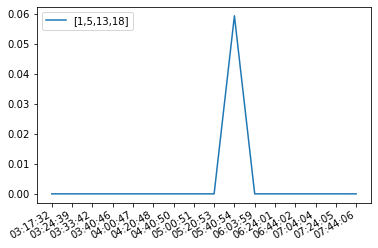

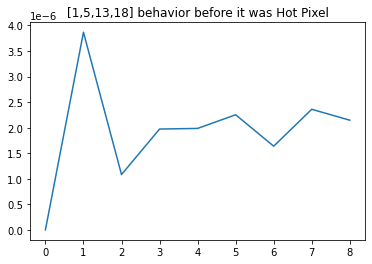

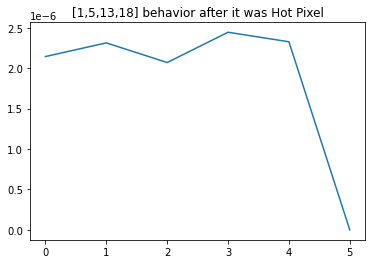

In [136]:
#Make array with times of measurements and ratios, to later plot. The numbers in the arrays were obtained using the function above.

times1  = ["03:17:32", "03:24:39", "03:33:42", "03:40:46", "04:00:47", "04:20:48", "04:40:50", "05:00:51", "05:20:53", "05:40:54", "06:03:59", "06:24:01", "06:44:02", "07:04:04", "07:24:05", "07:44:06"] 
ratios1 = [0.0, 3.866795425932538e-06,1.0831049505004114e-06 , 1.9729204626625967e-06, 1.9855181862942618e-06, 2.2525894657088006e-06, 1.6383089538808937e-06, 2.3597375472138373e-06, 2.1459061817566443e-06, 0.05936074169428989, 2.143353769944445e-06, 2.3124538357551513e-06, 2.069278504663779e-06, 2.443881380355863e-06, 2.3261024459487404e-06, 0.0]

plt.plot(times1, ratios1, label="[1,5,13,18]")
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()
plt.show()

#Behavior before 05:40:54
array5 = [0.0, 3.866795425932538e-06,1.0831049505004114e-06 , 1.9729204626625967e-06, 1.9855181862942618e-06, 2.2525894657088006e-06, 1.6383089538808937e-06, 2.3597375472138373e-06, 2.1459061817566443e-06]
plt.plot(array5)
plt.title("[1,5,13,18] behavior before it was Hot Pixel")
plt.show()

#Behavior after 05:40:54
array6 = [2.143353769944445e-06, 2.3124538357551513e-06, 2.069278504663779e-06, 2.443881380355863e-06, 2.3261024459487404e-06, 0.0]
plt.plot(array6)
plt.title("[1,5,13,18] behavior after it was Hot Pixel")
plt.show()


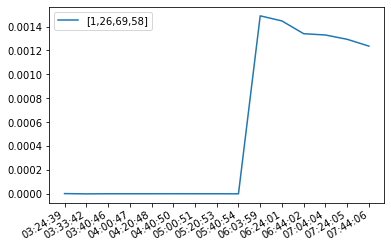

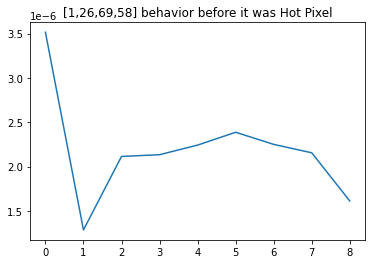

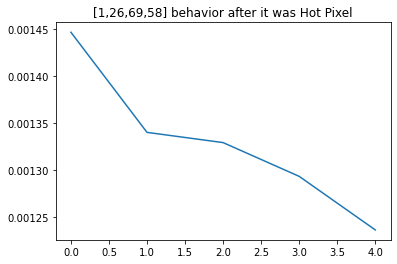

In [125]:
#Make array with times of measurements and ratios, to later plot. The numbers in the arrays were obtained using the function above.

times2  = ["03:24:39", "03:33:42", "03:40:46", "04:00:47", "04:20:48", "04:40:50", "05:00:51", "05:20:53", "05:40:54", "06:03:59", "06:24:01", "06:44:02", "07:04:04", "07:24:05", "07:44:06"]
ratios2 = [3.51526856902958e-06, 1.2861871287192385e-06, 2.114566034340937e-06, 2.1344320502663316e-06, 2.2426661640977487e-06, 2.3875356096191073e-06, 2.2506740471325254e-06, 2.1558409325981103e-06, 1.612258513007727e-06, 0.00148954072906499, 0.0014467414986782065, 0.0013401527289479977, 0.0013292628468933151, 0.0012933227747257525, 0.0012363122571529496]

plt.plot(times2, ratios2, label="[1,26,69,58]")
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()
plt.show()

#Behavior before 06:03:59
array7 = [3.51526856902958e-06, 1.2861871287192385e-06, 2.114566034340937e-06, 2.1344320502663316e-06, 2.2426661640977487e-06, 2.3875356096191073e-06, 2.2506740471325254e-06, 2.1558409325981103e-06, 1.612258513007727e-06]
plt.plot(array7)
plt.title("[1,26,69,58] behavior before it was Hot Pixel")
plt.show()

#Behavior after 06:03:59
array8 = [0.0014467414986782065, 0.0013401527289479977, 0.0013292628468933151, 0.0012933227747257525, 0.0012363122571529496]
plt.plot(array8)
plt.title("[1,26,69,58] behavior after it was Hot Pixel")
plt.show()

Once I got to this point I realized there was a simpler way of doing it, so I tried. Below is my attempt. Note that for it to work, all the files you want to look at need to be downloaded in your PC. 

In [26]:
def get_ratio(f, array):
    data_mask         = f['packets'][:]['packet_type']      == 0  #Select the packets that correspond to "data"
    valid_parity_mask = f['packets'][:]['valid_parity']     == 1  #Select the packets with the valid parity?
    io_group_mask     = f['packets'][:]['io_group']         == array[0]  #Select the packets corresponding to tile in IO Group 1
    io_channel_mask   = f['packets'][:]['io_channel']       == array[1]  #Select the packets corresponding to tile in IO Channel 8
    chip_mask         = f['packets'][:]['chip_id']          == array[2]  #Select the packets corresponding to chip in tile specified above
    pixel_mask        = f['packets'][:]['register_address'] == array[3]  #Select the packet corresponding to pixel in chip specified above
    m                 = np.logical_and(pixel_mask, np.logical_and(chip_mask, np.logical_and(io_group_mask, np.logical_and(io_channel_mask, np.logical_and(data_mask, valid_parity_mask)))))
    n                 = np.logical_and(data_mask, valid_parity_mask)
    adc               = f['packets']['dataword'][m]
    total_packets     = f['packets']['dataword'][n]
    return (len(adc)/len(total_packets))

In [33]:
#This cell takes about 3 minutes per file to run on my computer, so I am hoping for a better place to run this, or I'll improve my code.

strings = ['/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_07_44_06_CET.h5', 
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_07_24_05_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_07_04_04_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_06_44_02_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_06_24_01_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_06_03_59_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_05_40_54_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_05_20_53_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_05_00_51_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_04_40_50_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_04_20_48_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_04_00_47_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_03_40_46_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_03_33_42_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_03_24_39_CET.h5',
           '/Users/pcastano/Desktop/Research/LBNL Neutrino Group/Hot Pixels/packet_2022_02_09_03_17_32_CET.h5']

import timeit
start_time = timeit.default_timer()
ratios = []
times = []
for i in strings:
    filename  = hp.File(i,'r')
    timestamp = str(i[82:90])
    times.append(timestamp)
    a     = 1
    b     = 5
    c     = 13
    d     = 18
    pixel = [a,b,c,d]
    ratios.append(get_ratio(filename, pixel))
print(ratios)

elapsed = timeit.default_timer() - start_time
print("It took ", elapsed, " seconds to run this cell.")

[0.0, 2.3261024459487404e-06, 2.443881380355863e-06, 2.069278504663779e-06, 2.3124538357551513e-06, 2.143353769944445e-06, 0.05936074169428989, 2.1459061817566443e-06, 2.3597375472138373e-06, 1.6383089538808937e-06, 2.2525894657088006e-06, 1.9855181862942618e-06, 1.9729204626625967e-06, 1.0831049505004114e-06, 3.866795425932538e-06, 0.0]
It took  1476.2650998739996  seconds to run this cell.


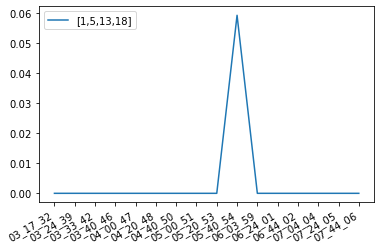

In [41]:
plt.plot(times, ratios, label = "[1,5,13,18]")
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()
plt.show()

We see that we get the same plot as above in cell [136], it's just inverted, so this works. 